In [64]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import itertools

In [65]:
rootDir = './animals-dataset'
trainingDir = rootDir + '/training'
testDir = rootDir + '/test'

In [66]:
seed = 512
validation_split = 0.2
interpolation = "bilinear"
batch_size = 16
img_height = 256
img_width = 256

In [67]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainingDir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation=interpolation
)

Found 837 files belonging to 4 classes.
Using 670 files for training.


In [68]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    trainingDir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation=interpolation
)

Found 837 files belonging to 4 classes.
Using 167 files for validation.


In [69]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testDir,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    interpolation=interpolation
)

Found 80 files belonging to 4 classes.


In [70]:
class_names = train_ds.class_names
print(class_names)

['chicken', 'elefant', 'sheep', 'spider']


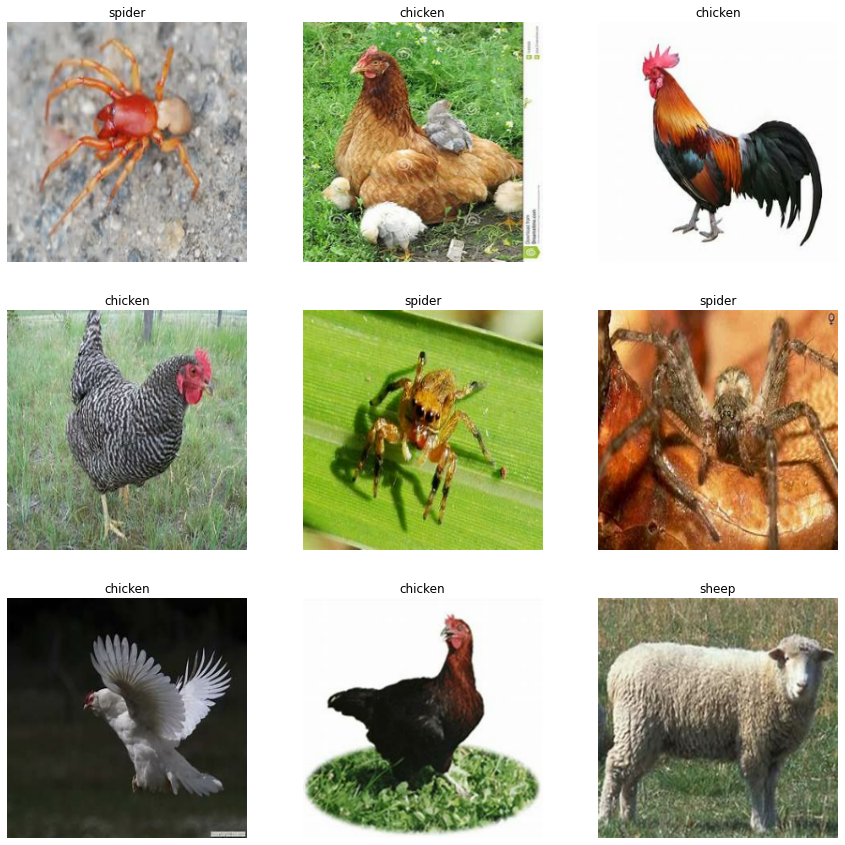

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

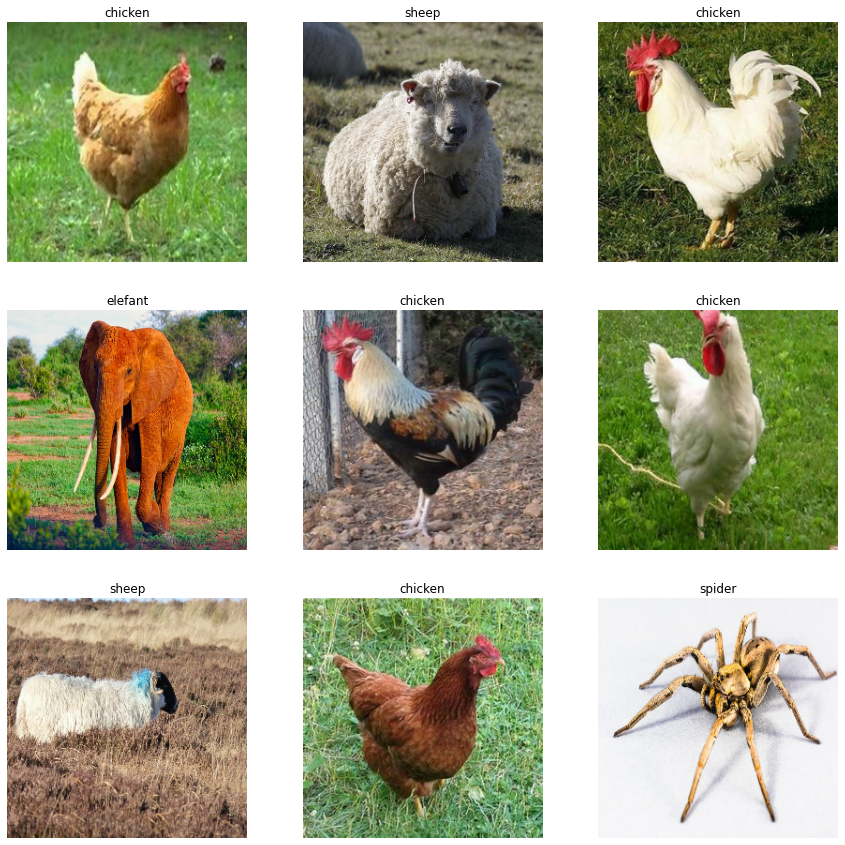

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [77]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

(16, 256, 256, 3)
(16,)


In [130]:
num_classes = len(class_names)
print(num_classes)
    
# model = tf.keras.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255),
#     layers.Conv2D(16, 2, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(16, 2, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(16, 2, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dropout(0.5),
#     layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dropout(0.5),
#     layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     layers.Dropout(0.5),
#     #layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     #layers.Dropout(0.5),
#     #layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     #layers.Dropout(0.5),
#     layers.Dense(num_classes)
# ])
    
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(factor=0.2),
    layers.Dropout(0.1),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

4


In [131]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.001),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
random_rotation_6 (RandomRot (None, 256, 256, 3)       0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 64, 32)      

In [133]:
history = model.fit(
    train_ds,
    #steps_per_epoch=100,
    validation_data=val_ds,
    epochs=25
)

Epoch 1/25
42/42 [==============================] - 9s 218ms/step - loss: 0.7897 - accuracy: 0.7403 - val_loss: 1.0776 - val_accuracy: 0.6048
Epoch 2/25
42/42 [==============================] - 9s 225ms/step - loss: 0.7701 - accuracy: 0.7254 - val_loss: 0.9028 - val_accuracy: 0.7545
Epoch 3/25
42/42 [==============================] - 10s 227ms/step - loss: 0.7107 - accuracy: 0.7731 - val_loss: 0.9040 - val_accuracy: 0.7365
Epoch 4/25
42/42 [==============================] - 9s 215ms/step - loss: 0.6751 - accuracy: 0.7791 - val_loss: 0.8821 - val_accuracy: 0.7305
Epoch 5/25
42/42 [==============================] - 9s 223ms/step - loss: 0.7166 - accuracy: 0.7791 - val_loss: 0.8803 - val_accuracy: 0.7126
Epoch 6/25
42/42 [==============================] - 9s 219ms/step - loss: 0.7103 - accuracy: 0.7552 - val_loss: 0.8556 - val_accuracy: 0.7425
Epoch 7/25
42/42 [==============================] - 9s 222ms/step - loss: 0.7105 - accuracy: 0.7896 - val_loss: 0.8543 - val_accuracy: 0.7425
Epoch

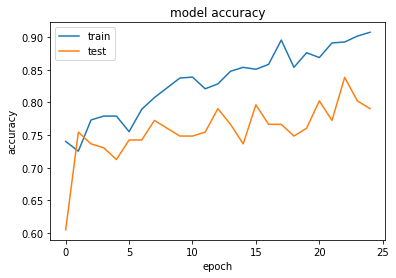

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

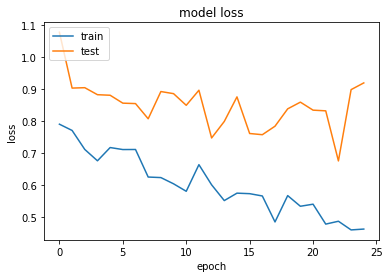

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

5/5 [==============================] - 0s 38ms/step - loss: 1.2431 - accuracy: 0.6750


In [137]:
print('Test accuracy: ' +  str(test_acc) + " Loss: " + str(test_loss))

Test accuracy: 0.675000011920929 Loss: 1.243080496788025


In [138]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_ds)

In [139]:
predictions[0]

array([3.9901715e-03, 1.5133858e-04, 1.5129111e-04, 9.9570721e-01],
      dtype=float32)

In [140]:
np.argmax(predictions[0])

3

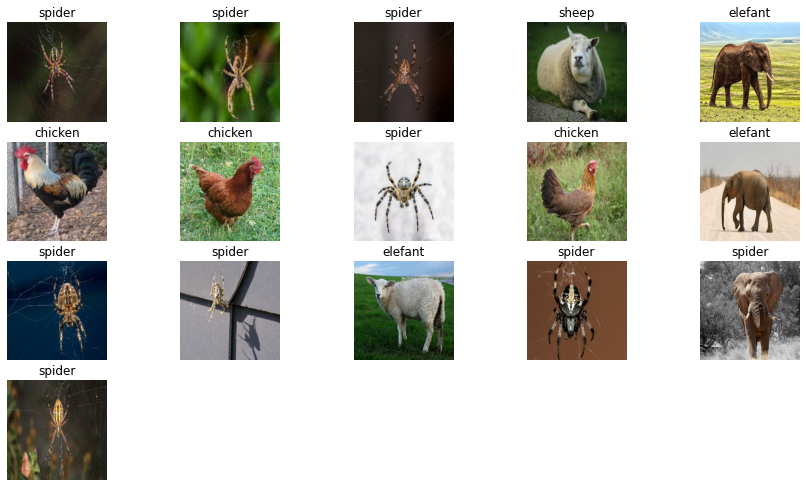

In [141]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(7, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(predictions[i])])
        plt.axis("off")

In [142]:
prediction_counter = 0
l = []
p = []
for images, labels in test_ds:
    for i in range(len(labels)):
        l.append(labels[i].numpy())
        p.append(np.argmax(predictions[prediction_counter]))
        prediction_counter += 1

In [143]:
cm = tf.math.confusion_matrix(l, p)
cm = cm / len(l)

In [144]:
# https://docs.python.org/3/library/itertools.html#module-itertools
# https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Use white text if squares are dark; otherwise black.
    threshold = np.max(cm) / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j].numpy(), horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return figure

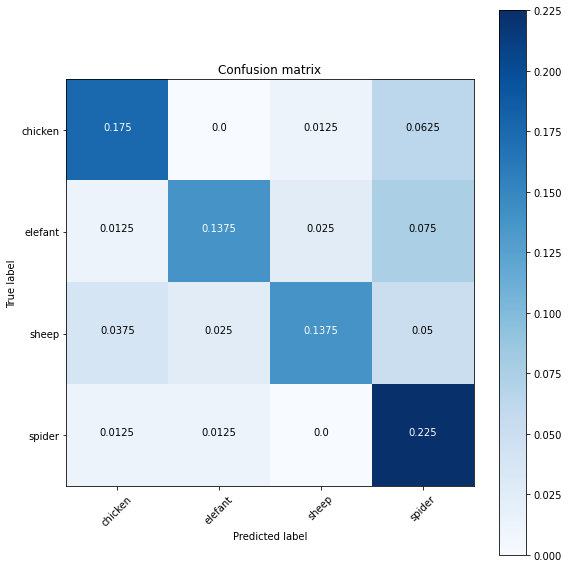

In [145]:
plot_confusion_matrix(cm, class_names)